In [1]:
import os
import joblib
import pickle

import pandas as pd
import numpy as np

from utils_visualize import (
    get_result_table,
    plot_rel_ood_perf
)

pd.options.display.max_rows = 100

In [2]:
train_years = [
    '2009_2010_2011_2012',
    '2009_2010_2011_2012_2013',
    '2009_2010_2011_2012_2013_2014',
    '2009_2010_2011_2012_2013_2014_2015',
    '2009_2010_2011_2012_2013_2014_2015_2016',
    '2009_2010_2011_2012_2013_2014_2015_2016_2017',
    '2009_2010_2011_2012_2013_2014_2015_2016_2017_2018',
]

y_axis = {
    'auc':{
        'lim':[-0.3, 0.1],
        'label':'AUROC'
    },
    'auprc':{
        'lim':[-0.4, 0.1],
        'label':'AUPRC'
    },
    'ace_abs_logistic_logit':{
        'lim':[-0.01, 0.1],
        'label':'Calibration'
    },
    'loss_bce':{
        'lim':[0, 0.4],
        'label':'BCE Loss'
    }
}
tasks = {
    'hospital_mortality':'In-Hospital Mortality',
    'LOS_7':'LOS > 7 Days',
    'readmission_30':'Readmission in 30 Days',
    'icu_admission':'Admission to ICU'
}
algos = {
    'erm':'ERM (Baseline)',
    'irm':'IRM',
    'dro':'GroupDRO',
    'coral':'CORAL', 
    'adversarial':'AL',
}
metrics = {
    'auc':'AUROC',
    'auprc':'AUPRC',
    'ace_abs_logistic_logit':'Calibration'
}


#### ID Performance

In [3]:
for year in train_years:
    algos['erm'] = f'ERM[{year[2:4]}-{year[-2:]}]'
    algos['irm'] = f'IRM[{year[2:4]}-{year[-2:]}]'
    algos['dro'] = f'GroupDRO[{year[2:4]}-{year[-2:]}]'
    algos['coral'] = f'CORAL[{year[2:4]}-{year[-2:]}]'
    algos['adversarial'] = f'AL[{year[2:4]}-{year[-2:]}]'
    
    df = get_result_table(
        train_year=year,
        tasks=tasks,
        algos=algos,
        metrics=metrics,
    )
    
    print(f"ID Performance of {year[2:4]}-{year[-2:]} Models")
    display(df)

ID Performance of 09-12 Models


Algorithm                                     ERM[09-12]  \
Metric      Task                                           
AUROC       Admission to ICU        0.841 (0.822, 0.857)   
            In-Hospital Mortality    0.819 (0.79, 0.844)   
            LOS > 7 Days             0.753 (0.74, 0.765)   
            Readmission in 30 Days  0.768 (0.748, 0.788)   
AUPRC       Admission to ICU        0.379 (0.333, 0.426)   
            In-Hospital Mortality   0.096 (0.074, 0.123)   
            LOS > 7 Days             0.45 (0.424, 0.473)   
            Readmission in 30 Days  0.258 (0.223, 0.299)   
Calibration Admission to ICU         0.005 (0.002, 0.01)   
            In-Hospital Mortality   0.005 (0.003, 0.008)   
            LOS > 7 Days            0.008 (0.003, 0.015)   
            Readmission in 30 Days  0.007 (0.003, 0.011)   

Algorithm                                     IRM[09-12]  \
Metric      Task                                           
AUROC       Admission to ICU         0.84 (0.821, 0.855)   
            In-Hospital Mortality   0.819 (0.793, 0.841)   
            LOS > 7 Days            0.751 (0.739, 0.763)   
            Readmission in 30 Days  0.766 (0.744, 0.785)   
AUPRC       Admission to ICU        0.375 (0.327, 0.424)   
            In-Hospital Mortality   0.097 (0.075, 0.126)   
            LOS > 7 Days            0.449 (0.424, 0.472)   
            Readmission in 30 Days  0.254 (0.216, 0.291)   
Calibration Admission to ICU         0.006 (0.002, 0.01)   
            In-Hospital Mortality   0.009 (0.006, 0.011)   
            LOS > 7 Days            0.011 (0.005, 0.018)   
            Readmission in 30 Days  0.004 (0.003, 0.007)   

Algorithm                                GroupDRO[09-12]  \
Metric      Task                                           
AUROC       Admission to ICU         0.84 (0.823, 0.858)   
            In-Hospital Mortality   0.821 (0.794, 0.844)   
            LOS > 7 Days            0.753 (0.739, 0.766)   
            Readmission in 30 Days  0.769 (0.747, 0.789)   
AUPRC       Admission to ICU        0.377 (0.327, 0.426)   
            In-Hospital Mortality   0.097 (0.077, 0.124)   
            LOS > 7 Days            0.449 (0.424, 0.474)   
            Readmission in 30 Days  0.258 (0.221, 0.295)   
Calibration Admission to ICU        0.005 (0.002, 0.009)   
            In-Hospital Mortality   0.005 (0.003, 0.008)   
            LOS > 7 Days            0.009 (0.003, 0.015)   
            Readmission in 30 Days  0.007 (0.003, 0.011)   

Algorithm                                   CORAL[09-12]             AL[09-12]  
Metric      Task                                                                
AUROC       Admission to ICU        0.838 (0.819, 0.855)  0.842 (0.823, 0.859)  
            In-Hospital Mortality   0.823 (0.796, 0.848)  0.822 (0.795, 0.847)  
            LOS > 7 Days             0.753 (0.74, 0.765)  0.753 (0.741, 0.765)  
            Readmission in 30 Days  0.767 (0.746, 0.789)  0.769 (0.747, 0.791)  
AUPRC       Admission to ICU        0.389 (0.342, 0.439)  0.381 (0.332, 0.424)  
            In-Hospital Mortality     0.1 (0.079, 0.126)  0.097 (0.076, 0.122)  
            LOS > 7 Days             0.45 (0.424, 0.473)  0.451 (0.426, 0.476)  
            Readmission in 30 Days  0.258 (0.223, 0.294)  0.259 (0.226, 0.297)  
Calibration Admission to ICU        0.005 (0.002, 0.009)  0.003 (0.001, 0.006)  
            In-Hospital Mortality   0.004 (0.002, 0.006)  0.005 (0.002, 0.007)  
            LOS > 7 Days            0.008 (0.003, 0.015)   0.01 (0.004, 0.017)  
            Readmission in 30 Days  0.007 (0.004, 0.012)  0.007 (0.003, 0.012)

ID Performance of 09-13 Models


Algorithm                                     ERM[09-13]  \
Metric      Task                                           
AUROC       Admission to ICU        0.837 (0.821, 0.854)   
            In-Hospital Mortality    0.83 (0.807, 0.851)   
            LOS > 7 Days            0.755 (0.745, 0.766)   
            Readmission in 30 Days  0.769 (0.749, 0.787)   
AUPRC       Admission to ICU         0.384 (0.34, 0.424)   
            In-Hospital Mortality   0.103 (0.083, 0.129)   
            LOS > 7 Days            0.451 (0.431, 0.472)   
            Readmission in 30 Days  0.258 (0.225, 0.292)   
Calibration Admission to ICU         0.006 (0.003, 0.01)   
            In-Hospital Mortality   0.004 (0.002, 0.006)   
            LOS > 7 Days             0.01 (0.005, 0.016)   
            Readmission in 30 Days  0.008 (0.004, 0.012)   

Algorithm                                     IRM[09-13]  \
Metric      Task                                           
AUROC       Admission to ICU        0.837 (0.821, 0.853)   
            In-Hospital Mortality    0.83 (0.808, 0.849)   
            LOS > 7 Days            0.755 (0.743, 0.766)   
            Readmission in 30 Days  0.769 (0.748, 0.789)   
AUPRC       Admission to ICU        0.382 (0.343, 0.419)   
            In-Hospital Mortality   0.102 (0.083, 0.126)   
            LOS > 7 Days             0.449 (0.427, 0.47)   
            Readmission in 30 Days    0.261 (0.229, 0.3)   
Calibration Admission to ICU         0.006 (0.003, 0.01)   
            In-Hospital Mortality   0.005 (0.003, 0.007)   
            LOS > 7 Days            0.012 (0.006, 0.017)   
            Readmission in 30 Days  0.005 (0.002, 0.009)   

Algorithm                                GroupDRO[09-13]  \
Metric      Task                                           
AUROC       Admission to ICU         0.837 (0.82, 0.853)   
            In-Hospital Mortality   0.829 (0.806, 0.849)   
            LOS > 7 Days            0.755 (0.744, 0.764)   
            Readmission in 30 Days  0.769 (0.749, 0.788)   
AUPRC       Admission to ICU        0.382 (0.342, 0.421)   
            In-Hospital Mortality   0.102 (0.082, 0.125)   
            LOS > 7 Days            0.448 (0.428, 0.468)   
            Readmission in 30 Days  0.258 (0.223, 0.296)   
Calibration Admission to ICU        0.006 (0.003, 0.009)   
            In-Hospital Mortality   0.004 (0.002, 0.006)   
            LOS > 7 Days            0.009 (0.004, 0.015)   
            Readmission in 30 Days  0.008 (0.005, 0.012)   

Algorithm                                   CORAL[09-13]             AL[09-13]  
Metric      Task                                                                
AUROC       Admission to ICU        0.836 (0.819, 0.852)   0.837 (0.82, 0.852)  
            In-Hospital Mortality   0.833 (0.812, 0.852)  0.828 (0.807, 0.848)  
            LOS > 7 Days            0.755 (0.744, 0.767)  0.755 (0.744, 0.766)  
            Readmission in 30 Days  0.769 (0.751, 0.789)  0.769 (0.749, 0.788)  
AUPRC       Admission to ICU        0.387 (0.343, 0.424)  0.381 (0.342, 0.422)  
            In-Hospital Mortality   0.105 (0.085, 0.128)  0.104 (0.083, 0.129)  
            LOS > 7 Days             0.45 (0.428, 0.472)   0.448 (0.428, 0.47)  
            Readmission in 30 Days  0.258 (0.225, 0.289)  0.259 (0.227, 0.292)  
Calibration Admission to ICU        0.005 (0.002, 0.008)  0.007 (0.004, 0.011)  
            In-Hospital Mortality   0.003 (0.002, 0.005)  0.003 (0.001, 0.005)  
            LOS > 7 Days             0.01 (0.005, 0.016)   0.01 (0.005, 0.016)  
            Readmission in 30 Days  0.008 (0.005, 0.012)  0.006 (0.003, 0.009)

ID Performance of 09-14 Models


Algorithm                                     ERM[09-14]  \
Metric      Task                                           
AUROC       Admission to ICU        0.846 (0.832, 0.859)   
            In-Hospital Mortality   0.825 (0.804, 0.843)   
            LOS > 7 Days            0.763 (0.754, 0.773)   
            Readmission in 30 Days  0.768 (0.748, 0.786)   
AUPRC       Admission to ICU        0.401 (0.364, 0.438)   
            In-Hospital Mortality   0.101 (0.082, 0.123)   
            LOS > 7 Days             0.449 (0.43, 0.467)   
            Readmission in 30 Days  0.259 (0.229, 0.292)   
Calibration Admission to ICU        0.006 (0.003, 0.009)   
            In-Hospital Mortality   0.006 (0.004, 0.008)   
            LOS > 7 Days             0.01 (0.007, 0.014)   
            Readmission in 30 Days  0.004 (0.002, 0.007)   

Algorithm                                     IRM[09-14]  \
Metric      Task                                           
AUROC       Admission to ICU         0.846 (0.833, 0.86)   
            In-Hospital Mortality   0.823 (0.802, 0.842)   
            LOS > 7 Days            0.763 (0.753, 0.772)   
            Readmission in 30 Days  0.766 (0.748, 0.784)   
AUPRC       Admission to ICU        0.398 (0.361, 0.435)   
            In-Hospital Mortality     0.1 (0.082, 0.123)   
            LOS > 7 Days            0.447 (0.427, 0.465)   
            Readmission in 30 Days  0.257 (0.228, 0.293)   
Calibration Admission to ICU        0.005 (0.002, 0.008)   
            In-Hospital Mortality   0.006 (0.004, 0.008)   
            LOS > 7 Days             0.007 (0.005, 0.01)   
            Readmission in 30 Days  0.004 (0.002, 0.007)   

Algorithm                                GroupDRO[09-14]  \
Metric      Task                                           
AUROC       Admission to ICU        0.846 (0.832, 0.859)   
            In-Hospital Mortality   0.825 (0.803, 0.844)   
            LOS > 7 Days            0.764 (0.754, 0.773)   
            Readmission in 30 Days  0.767 (0.749, 0.786)   
AUPRC       Admission to ICU        0.399 (0.365, 0.432)   
            In-Hospital Mortality    0.099 (0.081, 0.12)   
            LOS > 7 Days             0.449 (0.43, 0.468)   
            Readmission in 30 Days  0.257 (0.226, 0.288)   
Calibration Admission to ICU        0.005 (0.002, 0.008)   
            In-Hospital Mortality   0.006 (0.004, 0.008)   
            LOS > 7 Days            0.011 (0.007, 0.016)   
            Readmission in 30 Days  0.006 (0.003, 0.009)   

Algorithm                                   CORAL[09-14]             AL[09-14]  
Metric      Task                                                                
AUROC       Admission to ICU        0.841 (0.828, 0.856)   0.846 (0.832, 0.86)  
            In-Hospital Mortality   0.826 (0.806, 0.845)  0.823 (0.801, 0.844)  
            LOS > 7 Days            0.763 (0.753, 0.773)  0.764 (0.754, 0.773)  
            Readmission in 30 Days  0.769 (0.749, 0.785)  0.766 (0.748, 0.784)  
AUPRC       Admission to ICU         0.405 (0.37, 0.436)  0.398 (0.364, 0.437)  
            In-Hospital Mortality    0.106 (0.086, 0.13)   0.096 (0.079, 0.12)  
            LOS > 7 Days             0.451 (0.432, 0.47)    0.45 (0.431, 0.47)  
            Readmission in 30 Days  0.259 (0.231, 0.292)  0.256 (0.225, 0.287)  
Calibration Admission to ICU        0.004 (0.002, 0.007)  0.005 (0.002, 0.009)  
            In-Hospital Mortality   0.004 (0.003, 0.006)  0.006 (0.004, 0.008)  
            LOS > 7 Days             0.014 (0.01, 0.018)  0.011 (0.008, 0.015)  
            Readmission in 30 Days  0.005 (0.002, 0.007)  0.005 (0.002, 0.008)

ID Performance of 09-15 Models


Algorithm                                     ERM[09-15]  \
Metric      Task                                           
AUROC       Admission to ICU        0.846 (0.834, 0.859)   
            In-Hospital Mortality   0.831 (0.812, 0.848)   
            LOS > 7 Days            0.774 (0.765, 0.782)   
            Readmission in 30 Days   0.78 (0.765, 0.797)   
AUPRC       Admission to ICU        0.395 (0.364, 0.429)   
            In-Hospital Mortality     0.1 (0.083, 0.123)   
            LOS > 7 Days            0.457 (0.439, 0.474)   
            Readmission in 30 Days   0.257 (0.23, 0.287)   
Calibration Admission to ICU        0.005 (0.002, 0.008)   
            In-Hospital Mortality   0.005 (0.004, 0.007)   
            LOS > 7 Days            0.007 (0.004, 0.011)   
            Readmission in 30 Days  0.004 (0.002, 0.006)   

Algorithm                                     IRM[09-15]  \
Metric      Task                                           
AUROC       Admission to ICU        0.846 (0.833, 0.859)   
            In-Hospital Mortality    0.829 (0.81, 0.846)   
            LOS > 7 Days             0.771 (0.762, 0.78)   
            Readmission in 30 Days   0.78 (0.763, 0.795)   
AUPRC       Admission to ICU        0.393 (0.361, 0.426)   
            In-Hospital Mortality   0.101 (0.083, 0.121)   
            LOS > 7 Days            0.453 (0.435, 0.471)   
            Readmission in 30 Days  0.256 (0.228, 0.287)   
Calibration Admission to ICU        0.005 (0.002, 0.008)   
            In-Hospital Mortality   0.006 (0.004, 0.008)   
            LOS > 7 Days            0.007 (0.004, 0.011)   
            Readmission in 30 Days  0.003 (0.002, 0.005)   

Algorithm                                GroupDRO[09-15]  \
Metric      Task                                           
AUROC       Admission to ICU        0.846 (0.833, 0.859)   
            In-Hospital Mortality   0.831 (0.813, 0.847)   
            LOS > 7 Days            0.773 (0.765, 0.782)   
            Readmission in 30 Days   0.78 (0.764, 0.796)   
AUPRC       Admission to ICU        0.399 (0.367, 0.431)   
            In-Hospital Mortality   0.102 (0.085, 0.122)   
            LOS > 7 Days            0.456 (0.439, 0.472)   
            Readmission in 30 Days   0.256 (0.23, 0.284)   
Calibration Admission to ICU        0.006 (0.003, 0.009)   
            In-Hospital Mortality   0.005 (0.003, 0.007)   
            LOS > 7 Days            0.007 (0.003, 0.011)   
            Readmission in 30 Days  0.004 (0.002, 0.006)   

Algorithm                                   CORAL[09-15]             AL[09-15]  
Metric      Task                                                                
AUROC       Admission to ICU        0.845 (0.832, 0.858)  0.847 (0.834, 0.859)  
            In-Hospital Mortality    0.832 (0.813, 0.85)   0.83 (0.811, 0.847)  
            LOS > 7 Days            0.773 (0.764, 0.782)  0.774 (0.765, 0.783)  
            Readmission in 30 Days   0.78 (0.765, 0.795)  0.781 (0.766, 0.796)  
AUPRC       Admission to ICU        0.397 (0.363, 0.431)  0.399 (0.367, 0.433)  
            In-Hospital Mortality   0.104 (0.086, 0.123)  0.104 (0.087, 0.125)  
            LOS > 7 Days            0.455 (0.438, 0.472)   0.458 (0.44, 0.475)  
            Readmission in 30 Days   0.258 (0.23, 0.285)  0.258 (0.231, 0.287)  
Calibration Admission to ICU        0.004 (0.002, 0.007)  0.006 (0.003, 0.009)  
            In-Hospital Mortality   0.003 (0.002, 0.005)  0.005 (0.003, 0.006)  
            LOS > 7 Days             0.006 (0.003, 0.01)  0.007 (0.004, 0.011)  
            Readmission in 30 Days  0.005 (0.002, 0.007)  0.004 (0.001, 0.006)

ID Performance of 09-16 Models


Algorithm                                     ERM[09-16]  \
Metric      Task                                           
AUROC       Admission to ICU        0.855 (0.844, 0.867)   
            In-Hospital Mortality   0.833 (0.816, 0.849)   
            LOS > 7 Days             0.78 (0.772, 0.787)   
            Readmission in 30 Days   0.786 (0.77, 0.799)   
AUPRC       Admission to ICU        0.404 (0.373, 0.435)   
            In-Hospital Mortality     0.1 (0.084, 0.119)   
            LOS > 7 Days            0.461 (0.444, 0.476)   
            Readmission in 30 Days   0.252 (0.226, 0.28)   
Calibration Admission to ICU        0.004 (0.001, 0.006)   
            In-Hospital Mortality   0.003 (0.002, 0.004)   
            LOS > 7 Days            0.005 (0.003, 0.009)   
            Readmission in 30 Days  0.002 (0.001, 0.005)   

Algorithm                                     IRM[09-16]  \
Metric      Task                                           
AUROC       Admission to ICU        0.854 (0.843, 0.865)   
            In-Hospital Mortality   0.834 (0.818, 0.849)   
            LOS > 7 Days             0.778 (0.77, 0.787)   
            Readmission in 30 Days  0.783 (0.769, 0.798)   
AUPRC       Admission to ICU        0.397 (0.366, 0.429)   
            In-Hospital Mortality    0.101 (0.086, 0.12)   
            LOS > 7 Days             0.46 (0.444, 0.475)   
            Readmission in 30 Days  0.248 (0.225, 0.275)   
Calibration Admission to ICU        0.003 (0.001, 0.005)   
            In-Hospital Mortality   0.004 (0.003, 0.006)   
            LOS > 7 Days            0.004 (0.001, 0.008)   
            Readmission in 30 Days  0.005 (0.003, 0.007)   

Algorithm                                GroupDRO[09-16]  \
Metric      Task                                           
AUROC       Admission to ICU        0.856 (0.843, 0.867)   
            In-Hospital Mortality    0.83 (0.813, 0.846)   
            LOS > 7 Days             0.78 (0.772, 0.788)   
            Readmission in 30 Days  0.785 (0.771, 0.799)   
AUPRC       Admission to ICU        0.406 (0.372, 0.439)   
            In-Hospital Mortality   0.102 (0.085, 0.119)   
            LOS > 7 Days             0.46 (0.445, 0.476)   
            Readmission in 30 Days  0.253 (0.228, 0.277)   
Calibration Admission to ICU        0.004 (0.001, 0.007)   
            In-Hospital Mortality   0.004 (0.002, 0.005)   
            LOS > 7 Days            0.005 (0.003, 0.009)   
            Readmission in 30 Days  0.003 (0.002, 0.005)   

Algorithm                                   CORAL[09-16]             AL[09-16]  
Metric      Task                                                                
AUROC       Admission to ICU        0.855 (0.842, 0.865)  0.855 (0.845, 0.867)  
            In-Hospital Mortality    0.834 (0.817, 0.85)  0.833 (0.817, 0.849)  
            LOS > 7 Days             0.78 (0.773, 0.788)   0.78 (0.771, 0.788)  
            Readmission in 30 Days   0.785 (0.77, 0.799)  0.784 (0.769, 0.798)  
AUPRC       Admission to ICU        0.406 (0.373, 0.436)  0.405 (0.376, 0.439)  
            In-Hospital Mortality      0.1 (0.084, 0.12)  0.104 (0.088, 0.125)  
            LOS > 7 Days            0.461 (0.446, 0.478)  0.461 (0.445, 0.477)  
            Readmission in 30 Days   0.251 (0.225, 0.28)  0.251 (0.225, 0.277)  
Calibration Admission to ICU        0.003 (0.001, 0.005)  0.004 (0.002, 0.007)  
            In-Hospital Mortality   0.003 (0.001, 0.004)  0.003 (0.002, 0.004)  
            LOS > 7 Days            0.006 (0.003, 0.009)  0.006 (0.003, 0.009)  
            Readmission in 30 Days  0.003 (0.001, 0.005)  0.003 (0.002, 0.005)

ID Performance of 09-17 Models


Algorithm                                     ERM[09-17]  \
Metric      Task                                           
AUROC       Admission to ICU        0.862 (0.851, 0.871)   
            In-Hospital Mortality    0.84 (0.825, 0.856)   
            LOS > 7 Days            0.784 (0.777, 0.792)   
            Readmission in 30 Days   0.79 (0.777, 0.802)   
AUPRC       Admission to ICU        0.413 (0.386, 0.442)   
            In-Hospital Mortality   0.102 (0.087, 0.121)   
            LOS > 7 Days            0.463 (0.448, 0.478)   
            Readmission in 30 Days  0.252 (0.227, 0.278)   
Calibration Admission to ICU        0.004 (0.001, 0.006)   
            In-Hospital Mortality   0.004 (0.002, 0.005)   
            LOS > 7 Days             0.007 (0.004, 0.01)   
            Readmission in 30 Days  0.003 (0.002, 0.005)   

Algorithm                                     IRM[09-17]  \
Metric      Task                                           
AUROC       Admission to ICU        0.861 (0.852, 0.871)   
            In-Hospital Mortality   0.838 (0.824, 0.853)   
            LOS > 7 Days            0.784 (0.776, 0.791)   
            Readmission in 30 Days  0.788 (0.775, 0.802)   
AUPRC       Admission to ICU          0.41 (0.382, 0.44)   
            In-Hospital Mortality   0.102 (0.087, 0.119)   
            LOS > 7 Days            0.463 (0.448, 0.477)   
            Readmission in 30 Days  0.249 (0.225, 0.272)   
Calibration Admission to ICU        0.003 (0.001, 0.005)   
            In-Hospital Mortality   0.006 (0.005, 0.008)   
            LOS > 7 Days            0.008 (0.006, 0.012)   
            Readmission in 30 Days  0.007 (0.005, 0.008)   

Algorithm                                GroupDRO[09-17]  \
Metric      Task                                           
AUROC       Admission to ICU        0.863 (0.851, 0.873)   
            In-Hospital Mortality   0.841 (0.824, 0.855)   
            LOS > 7 Days            0.784 (0.776, 0.791)   
            Readmission in 30 Days   0.79 (0.775, 0.802)   
AUPRC       Admission to ICU        0.418 (0.389, 0.447)   
            In-Hospital Mortality   0.103 (0.087, 0.119)   
            LOS > 7 Days            0.463 (0.448, 0.478)   
            Readmission in 30 Days  0.252 (0.229, 0.279)   
Calibration Admission to ICU        0.004 (0.002, 0.007)   
            In-Hospital Mortality   0.004 (0.003, 0.005)   
            LOS > 7 Days            0.009 (0.006, 0.012)   
            Readmission in 30 Days  0.002 (0.001, 0.004)   

Algorithm                                   CORAL[09-17]             AL[09-17]  
Metric      Task                                                                
AUROC       Admission to ICU        0.862 (0.852, 0.872)  0.862 (0.852, 0.872)  
            In-Hospital Mortality    0.84 (0.824, 0.855)  0.841 (0.826, 0.856)  
            LOS > 7 Days            0.783 (0.776, 0.791)  0.784 (0.777, 0.792)  
            Readmission in 30 Days  0.789 (0.776, 0.802)   0.79 (0.777, 0.803)  
AUPRC       Admission to ICU        0.415 (0.386, 0.443)  0.414 (0.386, 0.443)  
            In-Hospital Mortality   0.104 (0.089, 0.121)   0.102 (0.088, 0.12)  
            LOS > 7 Days            0.462 (0.447, 0.476)  0.462 (0.447, 0.477)  
            Readmission in 30 Days  0.252 (0.227, 0.276)  0.253 (0.228, 0.277)  
Calibration Admission to ICU        0.003 (0.001, 0.005)  0.004 (0.001, 0.006)  
            In-Hospital Mortality   0.004 (0.003, 0.005)  0.004 (0.003, 0.006)  
            LOS > 7 Days            0.009 (0.007, 0.012)  0.008 (0.004, 0.011)  
            Readmission in 30 Days  0.003 (0.002, 0.005)  0.003 (0.002, 0.005)

ID Performance of 09-18 Models


Algorithm                                     ERM[09-18]  \
Metric      Task                                           
AUROC       Admission to ICU        0.863 (0.854, 0.871)   
            In-Hospital Mortality   0.846 (0.831, 0.861)   
            LOS > 7 Days            0.787 (0.781, 0.794)   
            Readmission in 30 Days    0.788 (0.776, 0.8)   
AUPRC       Admission to ICU         0.405 (0.379, 0.43)   
            In-Hospital Mortality     0.115 (0.1, 0.134)   
            LOS > 7 Days             0.467 (0.453, 0.48)   
            Readmission in 30 Days  0.261 (0.239, 0.285)   
Calibration Admission to ICU        0.003 (0.001, 0.005)   
            In-Hospital Mortality   0.003 (0.002, 0.005)   
            LOS > 7 Days            0.009 (0.006, 0.013)   
            Readmission in 30 Days  0.004 (0.002, 0.006)   

Algorithm                                     IRM[09-18]  \
Metric      Task                                           
AUROC       Admission to ICU        0.862 (0.853, 0.871)   
            In-Hospital Mortality    0.84 (0.826, 0.855)   
            LOS > 7 Days             0.787 (0.78, 0.794)   
            Readmission in 30 Days  0.782 (0.769, 0.794)   
AUPRC       Admission to ICU        0.399 (0.375, 0.425)   
            In-Hospital Mortality   0.109 (0.095, 0.126)   
            LOS > 7 Days             0.466 (0.453, 0.48)   
            Readmission in 30 Days   0.251 (0.23, 0.273)   
Calibration Admission to ICU        0.002 (0.001, 0.003)   
            In-Hospital Mortality   0.004 (0.002, 0.005)   
            LOS > 7 Days             0.007 (0.005, 0.01)   
            Readmission in 30 Days  0.003 (0.001, 0.004)   

Algorithm                                GroupDRO[09-18]  \
Metric      Task                                           
AUROC       Admission to ICU        0.863 (0.854, 0.872)   
            In-Hospital Mortality   0.845 (0.831, 0.857)   
            LOS > 7 Days             0.786 (0.78, 0.794)   
            Readmission in 30 Days  0.788 (0.776, 0.801)   
AUPRC       Admission to ICU        0.409 (0.381, 0.435)   
            In-Hospital Mortality   0.113 (0.098, 0.131)   
            LOS > 7 Days             0.466 (0.453, 0.48)   
            Readmission in 30 Days    0.26 (0.24, 0.286)   
Calibration Admission to ICU        0.004 (0.002, 0.006)   
            In-Hospital Mortality   0.003 (0.002, 0.005)   
            LOS > 7 Days            0.006 (0.004, 0.009)   
            Readmission in 30 Days  0.005 (0.003, 0.007)   

Algorithm                                   CORAL[09-18]             AL[09-18]  
Metric      Task                                                                
AUROC       Admission to ICU        0.864 (0.855, 0.872)  0.863 (0.854, 0.872)  
            In-Hospital Mortality   0.847 (0.831, 0.861)   0.846 (0.83, 0.858)  
            LOS > 7 Days             0.787 (0.78, 0.793)  0.788 (0.781, 0.794)  
            Readmission in 30 Days    0.788 (0.775, 0.8)  0.788 (0.775, 0.801)  
AUPRC       Admission to ICU        0.408 (0.383, 0.433)  0.407 (0.381, 0.433)  
            In-Hospital Mortality   0.114 (0.099, 0.131)  0.112 (0.099, 0.128)  
            LOS > 7 Days            0.466 (0.452, 0.479)  0.466 (0.453, 0.479)  
            Readmission in 30 Days  0.261 (0.239, 0.284)  0.261 (0.237, 0.286)  
Calibration Admission to ICU        0.003 (0.001, 0.005)  0.003 (0.001, 0.006)  
            In-Hospital Mortality   0.002 (0.002, 0.003)  0.003 (0.002, 0.005)  
            LOS > 7 Days             0.007 (0.005, 0.01)  0.006 (0.005, 0.009)  
            Readmission in 30 Days  0.005 (0.003, 0.007)  0.004 (0.002, 0.007)

#### OOD Performance

Out-of-Distribution Results of ERM[09-12] and DG[09-12] algorithms


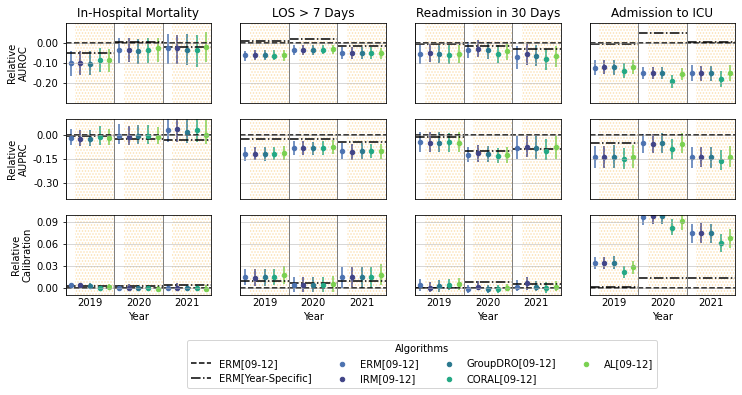

Out-of-Distribution Results of ERM[09-13] and DG[09-13] algorithms


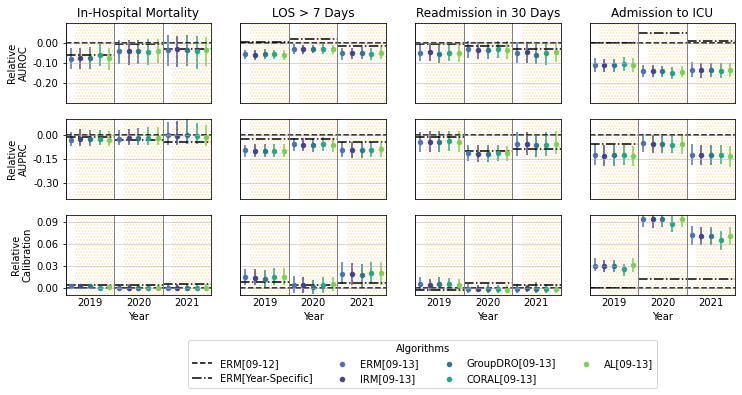

Out-of-Distribution Results of ERM[09-14] and DG[09-14] algorithms


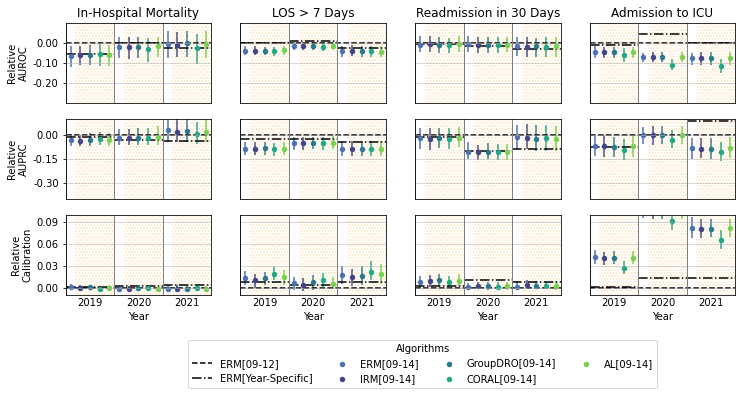

Out-of-Distribution Results of ERM[09-15] and DG[09-15] algorithms


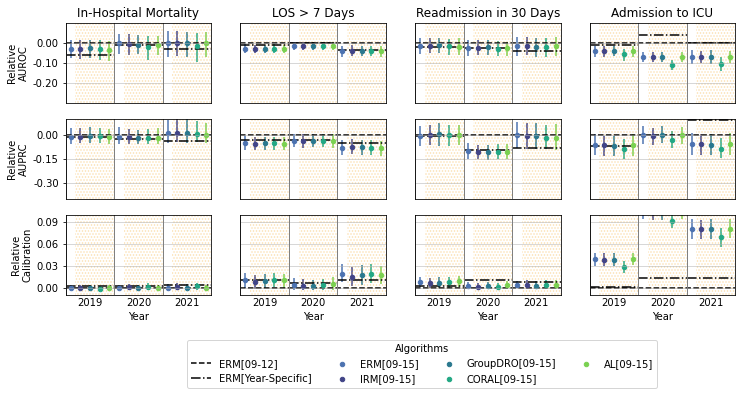

Out-of-Distribution Results of ERM[09-16] and DG[09-16] algorithms


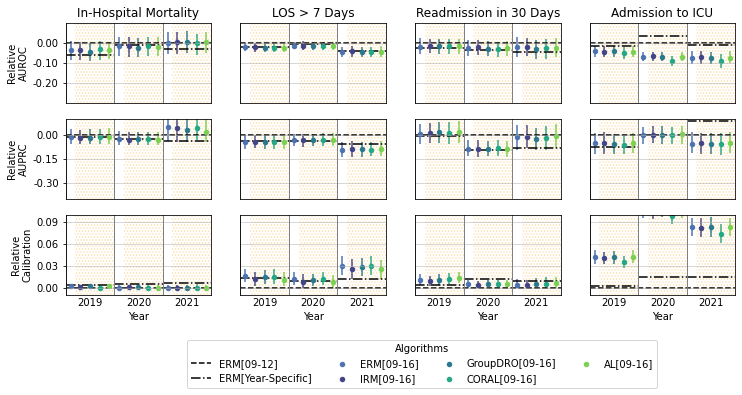

Out-of-Distribution Results of ERM[09-17] and DG[09-17] algorithms


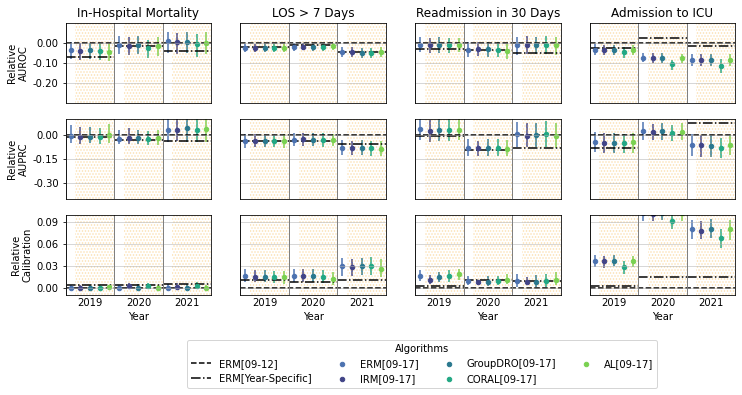

Out-of-Distribution Results of ERM[09-18] and DG[09-18] algorithms


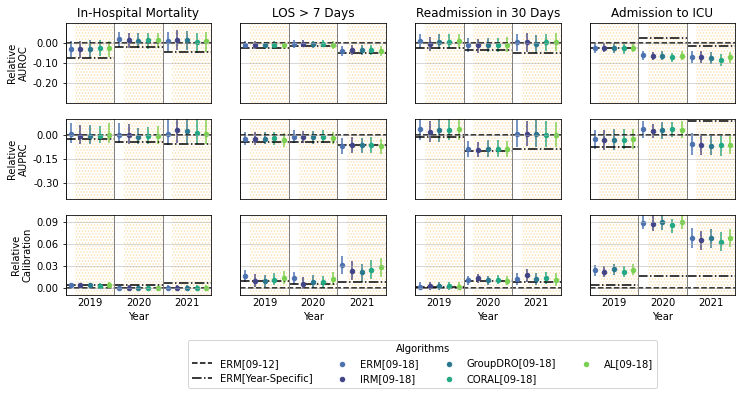

In [4]:
for year in train_years:
    
    algos['erm'] = f'ERM[{year[2:4]}-{year[-2:]}]'
    algos['irm'] = f'IRM[{year[2:4]}-{year[-2:]}]'
    algos['dro'] = f'GroupDRO[{year[2:4]}-{year[-2:]}]'
    algos['coral'] = f'CORAL[{year[2:4]}-{year[-2:]}]'
    algos['adversarial'] = f'AL[{year[2:4]}-{year[-2:]}]'
    
    print(f'Out-of-Distribution Results of ERM[{year[2:4]}-{year[-2:]}] and DG[{year[2:4]}-{year[-2:]}] algorithms')
    
    plot_rel_ood_perf(
        train_year=year,
        tasks=tasks,
        metrics=metrics,
        algos=algos,
        y_axis=y_axis,
        legend_ncols=4
    )